In [2]:
import keras
from keras.layers import *
import scipy
import sklearn
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
%matplotlib inline  


from numpy.random import random, permutation


Using TensorFlow backend.


In [3]:
# DATA_DIR = os.path.join(os.path.dirname(__file__), './../img')
DATA_DIR = os.path.join('./../img/subset')

X_dim = 100
Y_dim = 100


In [4]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True)

train_generator = datagen.flow_from_directory(
        DATA_DIR,
        target_size=(X_dim, Y_dim),
        batch_size=32,
        class_mode='binary')


Found 5840 images belonging to 2 classes.


In [5]:
valgen = ImageDataGenerator()

validation_generator = valgen.flow_from_directory(
        DATA_DIR,
        target_size=(X_dim, Y_dim),
        shuffle=False,
        batch_size=32,
        class_mode='binary')


Found 5840 images belonging to 2 classes.


In [19]:
model = Sequential()
model.add(Conv2D(50, 3, activation='relu', padding='same', input_shape=(X_dim, Y_dim, 3)))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D())
model.add(Conv2D(50, 3, activation='relu', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D())
model.add(Conv2D(50, 3, activation='relu', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D())
model.add(Conv2D(50, 3, activation='relu', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D())
model.add(Conv2D(50, 3, activation='relu', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001),
                loss='binary_crossentropy', metrics=['accuracy'])

print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 100, 100, 50)      1400      
_________________________________________________________________
batch_normalization_29 (Batc (None, 100, 100, 50)      400       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 50, 50, 50)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 50, 50, 50)        22550     
_________________________________________________________________
batch_normalization_30 (Batc (None, 50, 50, 50)        200       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 25, 25, 50)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 25, 25, 50)        22550     
__________

In [8]:
model.fit_generator(train_generator,steps_per_epoch=100, epochs=5, validation_data=validation_generator, validation_steps=10)

Epoch 1/5
100/100 [==============================] - 1351s 14s/step - loss: 7.2202 - acc: 0.5394 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/5
 97/100 [============================>.] - ETA: 41s - loss: 7.4576 - acc: 0.5322

KeyboardInterrupt: 

In [9]:
model.save_weights(filepath="./scenic_model.h5")

In [20]:
model.load_weights("./scenic_model.h5")

In [12]:

model.optimizer.lr = 0.0001
model.fit_generator(train_generator,steps_per_epoch=100, epochs=5, validation_data=validation_generator, validation_steps=10)

model.save_weights(filepath="./scenic_model_2.h5")

Epoch 1/5
100/100 [==============================] - 453s 5s/step - loss: 0.5249 - acc: 0.7425 - val_loss: 0.6708 - val_acc: 0.6500
Epoch 2/5
100/100 [==============================] - 434s 4s/step - loss: 0.4913 - acc: 0.7628 - val_loss: 0.4472 - val_acc: 0.8156
Epoch 3/5
100/100 [==============================] - 476s 5s/step - loss: 0.4794 - acc: 0.7706 - val_loss: 0.4086 - val_acc: 0.8250
Epoch 4/5
100/100 [==============================] - 491s 5s/step - loss: 0.4547 - acc: 0.7816 - val_loss: 0.3972 - val_acc: 0.8219
Epoch 5/5
100/100 [==============================] - 426s 4s/step - loss: 0.4829 - acc: 0.7656 - val_loss: 0.3780 - val_acc: 0.8375


In [13]:
model.fit_generator(train_generator,steps_per_epoch=100, epochs=10, validation_data=validation_generator, validation_steps=10)

model.save_weights(filepath="./scenic_model_3.h5")

Epoch 1/10
100/100 [==============================] - 470s 5s/step - loss: 0.4387 - acc: 0.7959 - val_loss: 0.4876 - val_acc: 0.8063
Epoch 2/10
100/100 [==============================] - 568s 6s/step - loss: 0.4325 - acc: 0.8016 - val_loss: 0.3490 - val_acc: 0.8625
Epoch 3/10
100/100 [==============================] - 455s 5s/step - loss: 0.4216 - acc: 0.8178 - val_loss: 0.3669 - val_acc: 0.8469
Epoch 4/10
100/100 [==============================] - 476s 5s/step - loss: 0.4207 - acc: 0.8025 - val_loss: 0.3286 - val_acc: 0.8688
Epoch 5/10
100/100 [==============================] - 519s 5s/step - loss: 0.4137 - acc: 0.8200 - val_loss: 0.3612 - val_acc: 0.8375
Epoch 6/10
100/100 [==============================] - 596s 6s/step - loss: 0.3884 - acc: 0.8241 - val_loss: 0.4359 - val_acc: 0.7937
Epoch 7/10
100/100 [==============================] - 542s 5s/step - loss: 0.3999 - acc: 0.8284 - val_loss: 0.3164 - val_acc: 0.8719
Epoch 8/10
100/100 [==============================] - 800s 8s/step - 

model.predict_generator(validation_generator)

In [50]:
import random
posList = os.listdir("./../img/subset/subset_positive")
negList = os.listdir("./../img/subset/subset_negative")
import matplotlib.pyplot as plt
numEachClass = 10
from imageio import imread
from skimage.transform import resize

posTest = os.path.join("./../img/subset/subset_positive", random.choice(posList))
negTest = os.path.join("./../img/subset/subset_negative", random.choice(negList))


pos = imread(posTest)
neg = imread(posTest)


pos_rs = resize(pos, (X_dim, Y_dim, 3), mode='edge')
neg_rs = resize(pos, (X_dim, Y_dim, 3), mode='edge')

p = np.expand_dims(resize(pos, (X_dim, Y_dim, 3), mode='edge'), axis=0)
n = np.expand_dims(resize(neg, (X_dim, Y_dim, 3), mode='edge'), axis=0)

print model.predict(p)
print model.predict(n)


plt.imshow(pos_rs)
plt.show()

[[ 0.33376762]]
[[ 0.33376762]]


In [46]:
pos


Image([[[ 79, 116, 220],
        [ 78, 115, 219],
        [ 82, 119, 225],
        ..., 
        [ 43,  44,  62],
        [ 41,  42,  60],
        [ 39,  40,  58]],

       [[ 86, 121, 221],
        [ 78, 116, 215],
        [ 80, 118, 219],
        ..., 
        [ 51,  52,  70],
        [ 38,  39,  57],
        [ 30,  31,  49]],

       [[ 88, 125, 216],
        [ 78, 114, 208],
        [ 80, 116, 212],
        ..., 
        [ 48,  49,  67],
        [ 40,  41,  59],
        [ 36,  37,  55]],

       ..., 
       [[151, 159, 161],
        [158, 166, 168],
        [155, 163, 165],
        ..., 
        [189, 189, 187],
        [150, 150, 148],
        [ 88,  88,  86]],

       [[141, 149, 151],
        [152, 160, 162],
        [152, 160, 162],
        ..., 
        [189, 189, 187],
        [ 77,  77,  75],
        [ 40,  40,  38]],

       [[135, 143, 145],
        [149, 157, 159],
        [151, 159, 161],
        ..., 
        [227, 227, 225],
        [104, 104, 102],
        [ 28,  28,

In [21]:
model.load_weights("./scenic_model_3.h5")

In [23]:
imgs, labels = next(validation_generator)
filenames = validation_generator.filenames

In [24]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
def plots_idx(idx, titles=None):
    plots([image.load_img('./../img/subset/' + filenames[i]) for i in idx], titles=titles)

In [25]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, batch_size=4, class_mode='categorical',
                target_size=(100,100)):
    return gen.flow_from_directory(dirname, target_size=target_size,
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

def get_data(path, target_size=(100,100), batch_size=10):
    batches = get_batches(path, shuffle=False, batch_size=batch_size, class_mode=None, target_size=target_size)
    return np.concatenate([batches.next() for i in range(batches.batch_size)])

In [26]:
# valgen = ImageDataGenerator()

# validation_generator = valgen.flow_from_directory(
#         DATA_DIR,
#         target_size=(X_dim, Y_dim),
#         batch_size=32,
#         class_mode='binary')

labels = validation_generator.classes
preds = model.predict_generator(validation_generator, steps=100)


In [27]:
labels[:100*32]
probs = preds
classes = np.round(preds)

In [28]:
np.where(classes==1)[0]

array([   0,    9,   27,   59,   71,   89,  170,  189,  201,  204,  208,
        215,  227,  235,  253,  271,  279,  325,  340,  380,  389,  414,
        417,  456,  473,  479,  489,  505,  514,  526,  558,  559,  581,
        597,  603,  607,  634,  686,  740,  742,  746,  754,  757,  838,
        857,  885,  940,  943,  969,  973,  978, 1004, 1051, 1059, 1061,
       1065, 1071, 1082, 1087, 1098, 1104, 1160, 1180, 1213, 1216, 1248,
       1290, 1291, 1294, 1314, 1322, 1332, 1338, 1349, 1370, 1390, 1427,
       1428, 1432, 1444, 1451, 1461, 1473, 1476, 1494, 1500, 1523, 1640,
       1652, 1684, 1721, 1730, 1731, 1745, 1754, 1819, 1837, 1887, 1893,
       1905, 1913, 1915, 1924, 1929, 1938, 2009, 2036, 2046, 2052, 2060,
       2071, 2077, 2085, 2090, 2092, 2102, 2109, 2125, 2126, 2131, 2165,
       2178, 2209, 2239, 2268, 2279, 2290, 2320, 2351, 2407, 2411, 2416,
       2417, 2419, 2422, 2429, 2444, 2479, 2484, 2493, 2542, 2579, 2640,
       2644, 2653, 2672, 2695, 2700, 2701, 2702, 27

In [29]:
np.where(classes==labels)[0]

array([   0,    0,    0, ..., 3199, 3199, 3199])

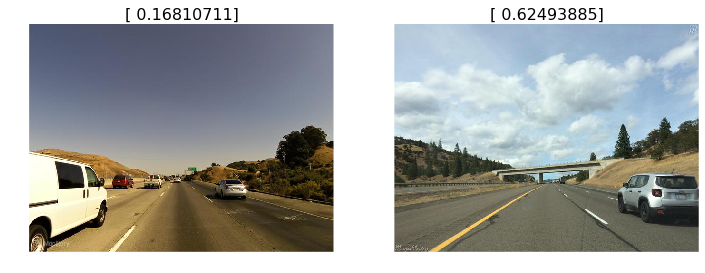

In [30]:
n_view=2
#1. A few correct labels at random
correct = np.where(classes==labels)[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])


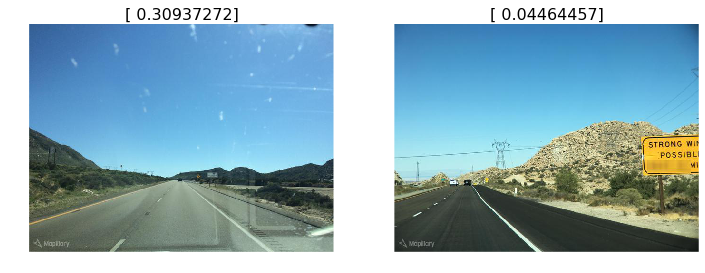

In [31]:
n_view=2
# Incorrect labels at random
correct = np.where(classes !=labels)[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

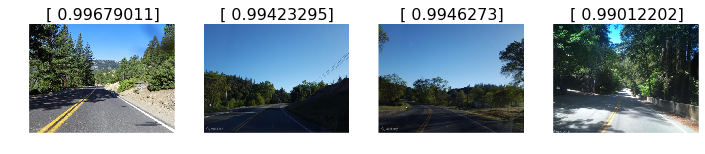

In [34]:
n_view=4
#Most scenic, correct labels
correct_negatives = permutation(np.where((probs>0.99) & (classes==labels))[0])[:n_view]
plots_idx(correct_negatives, probs[correct_negatives])

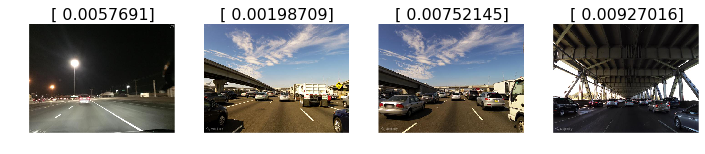

In [35]:
n_view=4
## Least scenic, correct labels
correct_negatives = permutation(np.where((probs<0.01) & (classes==labels))[0])[:n_view]
plots_idx(correct_negatives, probs[correct_negatives])

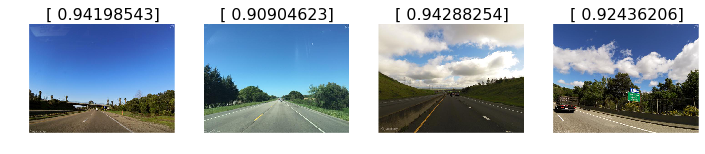

In [36]:
n_view=4
## Most scenic, incorrect labels
correct_negatives = permutation(np.where((probs>0.90) & (classes!=labels))[0])[:n_view]
plots_idx(correct_negatives, probs[correct_negatives])

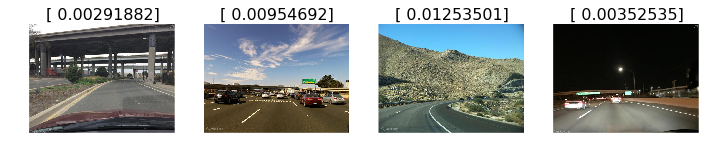

In [37]:
n_view=4
## Least scenic, incorrect labels
correct_negatives = permutation(np.where((probs<0.1) & (classes!=labels))[0])[:n_view]
plots_idx(correct_negatives, probs[correct_negatives])